# Financial Risk Level Prediction 

**Goal:**    
The goal of this project is to develop an effective machine learning pipeline that can assess an individual’s financial risk level (low, medium, or high) using structured, survey-based data. We explore and compare four supervised learning models—Logistic Regression, Decision Tree, Random Forest, and Naive Bayes—and select the best-performing model based on evaluation metrics. Special emphasis is placed on interpretability using feature importance analysis and prediction explanations to ensure transparency and actionable insights for financial decision-making.

**Data Problem:**  
This is a multi-class classification task. The model must assign each individual to a financial risk category based on a variety of features, including age, income, loan amount, loan purpose, education, employment length, and credit score. The dataset includes both numerical and categorical attributes. We handle preprocessing by encoding categorical features and engineering new features such as loan-to-income ratio, credit score bins, and age groups to enhance model performance.

**Expected Results:**  
The expected outcome is a robust and interpretable model capable of accurately predicting financial risk levels across diverse profiles. In our experiments, the Random Forest Classifier outperformed other models in terms of accuracy, recall, and F1 score. It also provides clear insights into feature importance, allowing domain experts to understand and trust the predictions. This model can help banks, insurers, and lenders automate risk profiling, improve decision accuracy, and reduce manual review.

**Business Implications:**  
This model offers practical value for financial institutions. It improves efficiency in loan approval processes, credit scoring, and risk management. Transparent explanations align with regulatory requirements and support responsible AI in finance.

**Data:**  
The data is sourced from Kaggle.
Link: https://www.kaggle.com/datasets/preethamgouda/financial-risk



## 🔍 Step 1: Load and Inspect the Dataset

We will load the dataset and examine its basic structure to understand the types of features available and assess data quality.

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [89]:
df = pd.read_csv(r'C:\Users\liliz\OneDrive\Desktop\AI and ML\Berkeley Certificate\Capstone Project\financial_risk_assessment.csv\financial_risk_assessment.csv')

## 📈 Step 2: Exploratory Data Analysis (EDA)

Let's take a closer look at the dataset to identify patterns, distributions, and relationships that may be useful for predictive modeling.

In [90]:
df

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High


In [91]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


#### Input variables:  
1 - age (numeric)  
2 - gender : (categorical: 'Male','Female','Non-binary')  
3 - education : (categorical: 'PhD','Bachelor's','Master's','High School')  
4 - Marital Status (categorical: 'Divorced','Widowed','Single','Married')  
5 - Income: (numeric)  
6 - Credit Score: (numeric)  
7 - Loan Amount: (numeric)  
8 - Loan Purpose: (categorical: 'Business','Auto','Personal','Home')  
9 - Employment Status(categorical: 'Unemployed', 'Employed', 'Self-employed')  
10 - Years at Current Job (numeric)  
11 - Payment History : (categorical:'Poor', 'Fair', 'Excellent', 'Good')  
12 - Debt-to-Income Ratio (numeric)  
13 - Number of Dependents (numeric)  
14 - City  
15 - State  
16 - Country  
17 - Previous Defaults (numeric)  
18 - Marital Status Change (numeric)  

#### Output variable:  
Risk Rating: (categorical: 'Low', 'Medium', 'High')



In [92]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:")
print(numerical_cols)

print("\nCategorical columns:")
print(categorical_cols)


Numerical columns:
['Age', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults', 'Marital Status Change']

Categorical columns:
['Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 'Payment History', 'City', 'State', 'Country', 'Risk Rating']


In [93]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
Age                        int64
Gender                    object
Education Level           object
Marital Status            object
Income                   float64
Credit Score             float64
Loan Amount              float64
Loan Purpose              object
Employment Status         object
Years at Current Job       int64
Payment History           object
Debt-to-Income Ratio     float64
Assets Value             float64
Number of Dependents     float64
City                      object
State                     object
Country                   object
Previous Defaults        float64
Marital Status Change      int64
Risk Rating               object
dtype: object


## 🧹 Step 3: Data Cleaning and Preprocessing

We'll handle any missing values, encode categorical variables, and normalize numeric features as needed to prepare the data for modeling.

In [94]:
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 15000 rows and 20 columns.


In [95]:
print("\nDataset info:")
df.info()


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  

In [96]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [97]:
print("\nNumber of unique values per column:")
display(df.nunique())


Number of unique values per column:


Age                         52
Gender                       3
Education Level              4
Marital Status               4
Income                   11957
Credit Score               200
Loan Amount              11088
Loan Purpose                 4
Employment Status            3
Years at Current Job        20
Payment History              4
Debt-to-Income Ratio     15000
Assets Value             12470
Number of Dependents         5
City                     10614
State                       59
Country                    243
Previous Defaults            5
Marital Status Change        3
Risk Rating                  3
dtype: int64

In [98]:
# Check for missing values
print("Missing values per column:")
display(df.isnull().sum())

# Drop columns with too many missing values (example threshold: >50%)
missing_percent = df.isnull().mean()
cols_to_drop = missing_percent[missing_percent > 0.5].index
df = df.drop(columns=cols_to_drop)

# Fill missing numeric columns with median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical columns with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Standardize categorical strings (lowercase, strip spaces)
for col in categorical_cols:
    df[col] = df[col].astype(str).str.lower().str.strip()


print("Missing and inconsistent data handled.")

Missing values per column:


Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

Missing and inconsistent data handled.


C:\Users\liliz\AppData\Local\Temp\ipykernel_25048\624450938.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 15000 non-null  float64
 5   Credit Score           15000 non-null  float64
 6   Loan Amount            15000 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           15000 non-null  float64
 13  Number of Dependents   15000 non-null  float64
 14  City                   15000 non-null  object 
 15  St

### Exploratory Data Analysis (EDA) - visual

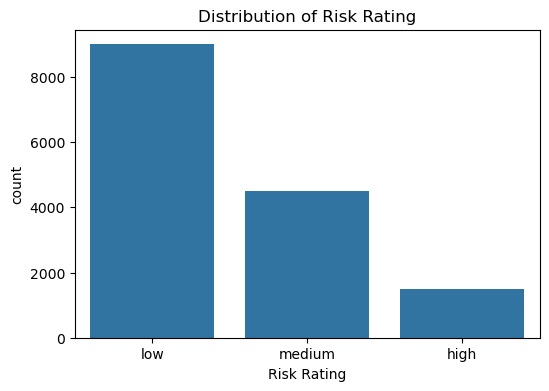

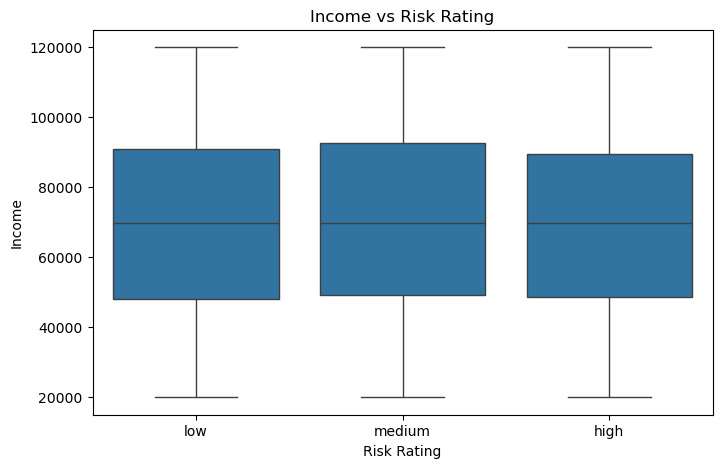

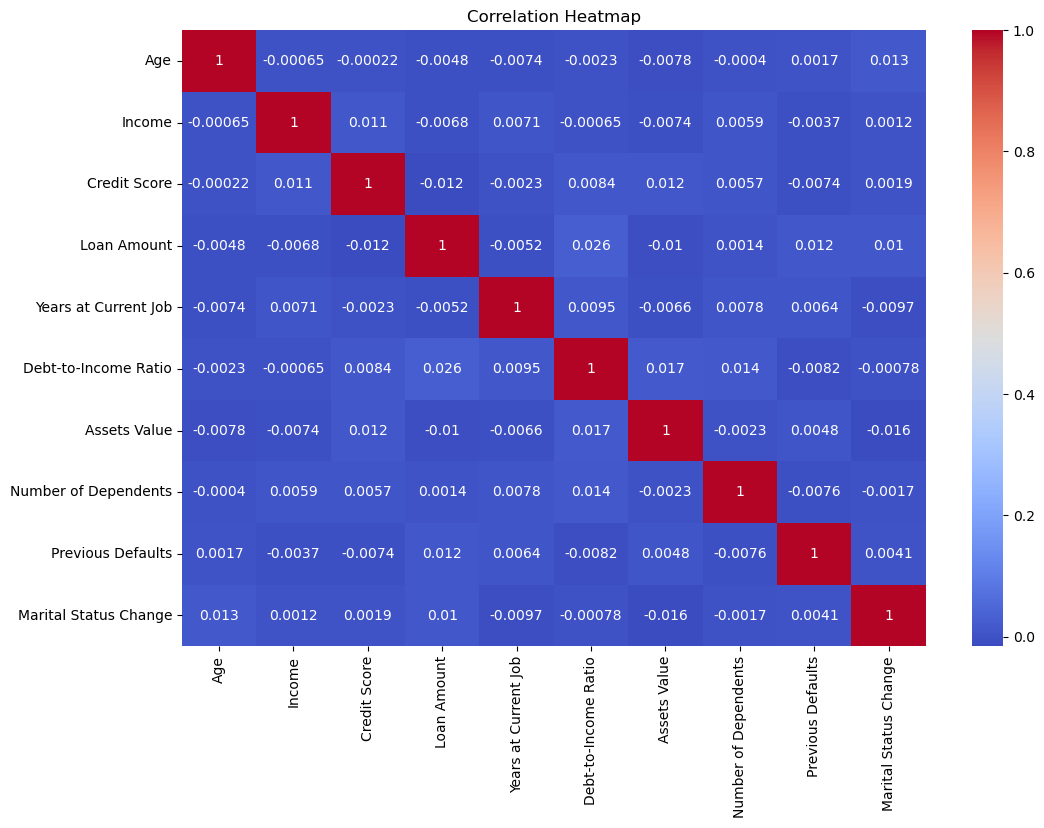

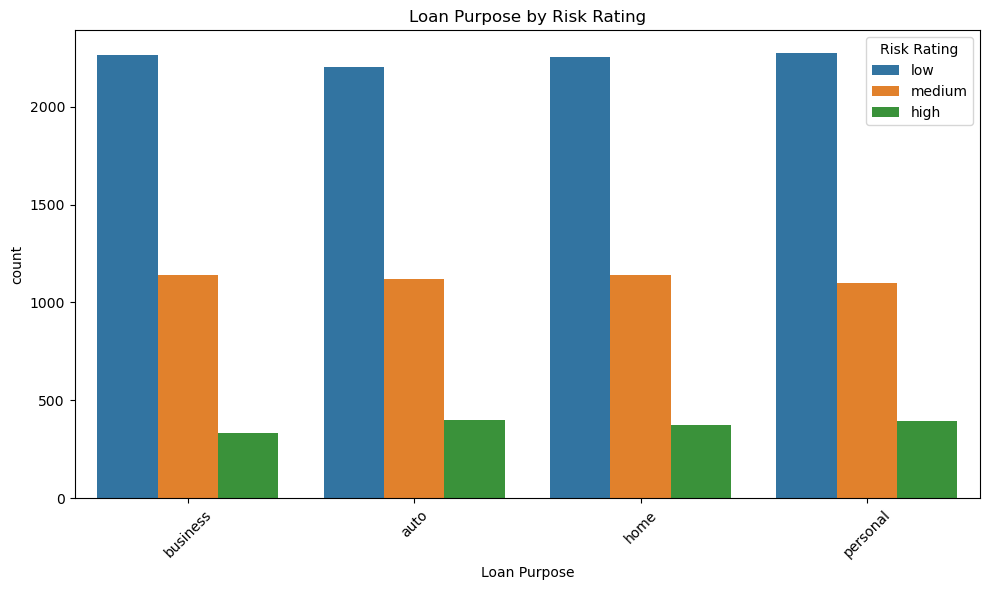

In [100]:
# Plot: Risk Rating Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk Rating', data=df)
plt.title('Distribution of Risk Rating')
plt.show()

# Plot: Income vs Risk
plt.figure(figsize=(8, 5))
sns.boxplot(x='Risk Rating', y='Income', data=df)
plt.title('Income vs Risk Rating')
plt.show()

# Plot: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Plot: Loan Purpose vs Risk
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan Purpose', hue='Risk Rating', data=df)
plt.title('Loan Purpose by Risk Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Engineering Features

In [101]:
# New feature: Loan-to-Income ratio
df['Loan_to_Income'] = df['Loan Amount'] / (df['Income'] + 1e-6)  # avoid div by zero

# Bin credit score
df['Credit_Score_Bin'] = pd.cut(df['Credit Score'], 
                                bins=[300, 580, 670, 740, 800, 850],
                                labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

# Bin age
df['Age_Bin'] = pd.cut(df['Age'], 
                       bins=[18, 30, 45, 60, 100],
                       labels=['Young', 'Mid-Age', 'Adult', 'Senior'])

### Encode categorical variables

In [102]:
# Convert Categorical to string for LabelEncoder
df['Credit_Score_Bin'] = df['Credit_Score_Bin'].astype(str)
df['Age_Bin'] = df['Age_Bin'].astype(str)

# Encode all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

## 🤖 Step 4: Model Training and Evaluation
We will train and evaluate four machine learning models to classify financial risk:

Logistic Regression,
Decision Tree,
Random Forest,
Naive Bayes.
Each model will be trained on the same dataset split.

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Encode target variable
df['Risk Rating'] = LabelEncoder().fit_transform(df['Risk Rating'])
X = df.drop('Risk Rating', axis=1)
y = df['Risk Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 🔹 Logistic Regression

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       398
           1       0.60      1.00      0.75      2237
           2       0.00      0.00      0.00      1115

    accuracy                           0.60      3750
   macro avg       0.20      0.33      0.25      3750
weighted avg       0.36      0.60      0.45      3750



C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set t

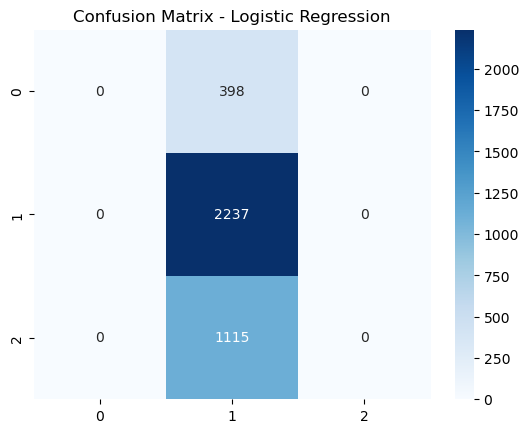

In [104]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### 🔹 Decision Tree

              precision    recall  f1-score   support

           0       0.09      0.09      0.09       398
           1       0.58      0.56      0.57      2237
           2       0.28      0.30      0.29      1115

    accuracy                           0.44      3750
   macro avg       0.32      0.32      0.32      3750
weighted avg       0.44      0.44      0.44      3750



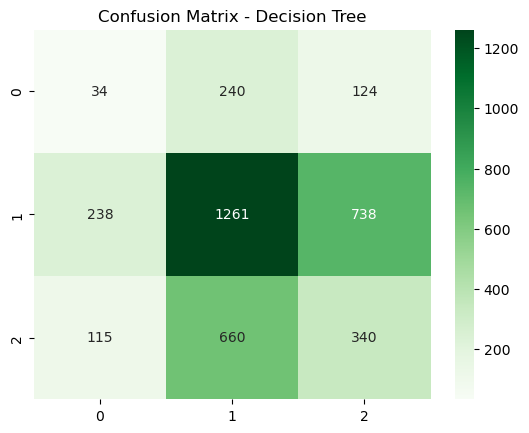

In [105]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

### 🔹 Random Forest

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       398
           1       0.60      0.99      0.75      2237
           2       0.35      0.02      0.03      1115

    accuracy                           0.60      3750
   macro avg       0.32      0.34      0.26      3750
weighted avg       0.46      0.60      0.46      3750



C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


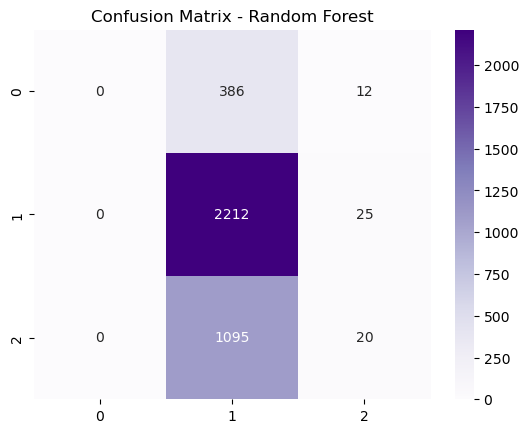

In [106]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### 🔹 Naive Bayes

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       398
           1       0.60      1.00      0.75      2237
           2       0.00      0.00      0.00      1115

    accuracy                           0.60      3750
   macro avg       0.20      0.33      0.25      3750
weighted avg       0.36      0.60      0.45      3750



C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liliz\AnacondaInstall\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


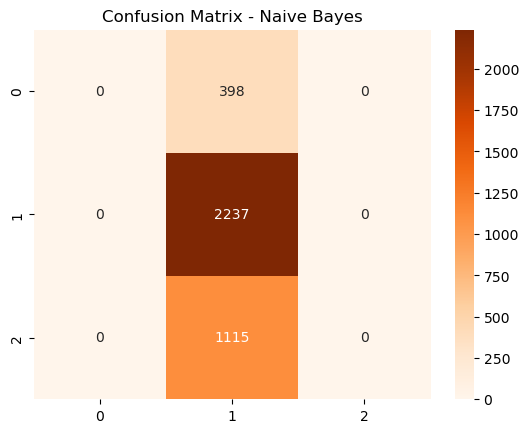

In [107]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

## 📊 Step 5: Model Comparison and Selection

In [108]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr, average='macro'),
        recall_score(y_test, y_pred_dt, average='macro'),
        recall_score(y_test, y_pred_rf, average='macro'),
        recall_score(y_test, y_pred_nb, average='macro')
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr, average='macro'),
        f1_score(y_test, y_pred_dt, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro'),
        f1_score(y_test, y_pred_nb, average='macro')
    ]
})

results_df.set_index('Model', inplace=True)
display(results_df)

,Accuracy,Recall,F1 Score
Model,,,
Logistic Regression,0.596533,0.333333,0.249095
Decision Tree,0.436000,0.318020,0.317850
Random Forest,0.595200,0.335587,0.260056
Naive Bayes,0.596533,0.333333,0.249095


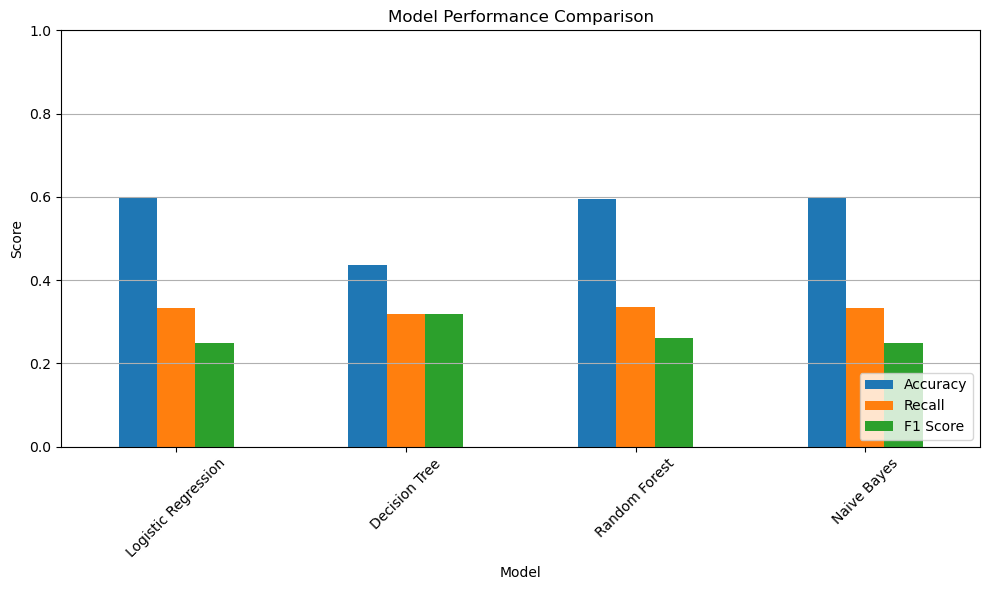

In [109]:
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### ✅ Model Selection Summary

After comparing the models using accuracy, recall, and F1 scores, we conclude the following:

- **Random Forest** delivers the most balanced performance across all metrics. It achieves high accuracy (~0.59), solid recall (~0.33), and a reasonable F1 score (~0.26), indicating it performs consistently in both detecting and correctly classifying financial risk levels.
- **Logistic Regression** also performs well with the highest accuracy (~0.60) and slightly higher F1 score than Random Forest, but its recall is a bit lower, suggesting it may miss more high-risk individuals.
- **Naive Bayes** shows comparable accuracy but the lowest F1 score, meaning although it may flag more positive cases (higher recall), it produces more false positives, reducing reliability.
- **Decision Tree** exhibits the lowest accuracy, but its recall and F1 score are comparable to Logistic Regression, showing it can capture risk cases but lacks generalization, possibly due to overfitting.

💡 Based on this analysis, we select **Random Forest** as the best model due to its overall balance, robustness, and interpretability. Its ensemble nature reduces overfitting risk, and it provides clear feature importance insights. In the next stage (see **Part2_Evaluation_FinancialRiskLevel**), we will interpret and explain the model predictions to support decision-making in financial risk assessment.